<img style="float: center;" width="500" src="https://forwardbaltimore.files.wordpress.com/2023/10/forward-baltimore.png?">
<br><br><br>

Author: Sachin Hebbar
Owner: Forward Baltimore
Copyright: MIT License

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_rows', 500)

In [9]:
big_list = pd.read_csv('https://github.com/baltimorehebbar/MTAMarylandAlerts/blob/main/big_list.csv')
big_list.head()

,alert_datetime,service,comment,comment_title
0,2023-10-28 21:00:00,LBUS,LocalLink Temporary Route Diversions Due to a ...,NaN
1,2023-10-28 20:39:00,MARC,MARC Penn 494 - Delay Penn Line Train 494 (7:...,NaN
2,2023-10-28 19:57:00,MARC,MARC Penn 494 - Delay Penn Line Train 494 (7:...,NaN
3,2023-10-28 17:54:00,MARC,MARC Penn 492 - Delay Penn Line Train 492 (5:...,NaN
4,2023-10-28 16:54:00,MARC,MARC Penn 490 - Delay Penn Line Train 490 (4:...,NaN


In [10]:
big_list['alert_datetime'] = pd.to_datetime(big_list['alert_datetime'])

In [11]:
big_list = big_list.sort_values(by='alert_datetime', ascending=False)
big_list.head()

,alert_datetime,service,comment,comment_title
0,2023-10-28 21:00:00,LBUS,LocalLink Temporary Route Diversions Due to a ...,NaN
1,2023-10-28 20:39:00,MARC,MARC Penn 494 - Delay Penn Line Train 494 (7:...,NaN
2,2023-10-28 19:57:00,MARC,MARC Penn 494 - Delay Penn Line Train 494 (7:...,NaN
3,2023-10-28 17:54:00,MARC,MARC Penn 492 - Delay Penn Line Train 492 (5:...,NaN
4,2023-10-28 16:54:00,MARC,MARC Penn 490 - Delay Penn Line Train 490 (4:...,NaN


In [12]:
big_list.service.unique()

array(['LBUS', 'MARC', 'CL', 'BUS', 'LR', 'METRO', 'EBUS', 'PURPLE'],
      dtype=object)

In [14]:
lr = big_list[big_list['service'] == 'LR']
del lr['comment_title'], lr['service']
#lr.set_index('alert_datetime', inplace=True)
lr.head()

,alert_datetime,comment
64,2023-10-24 11:07:00,Light Rail Service Advisory; Updated Light Ra...
70,2023-10-24 10:28:00,Light Rail Service Advisory; Updated Light Ra...
72,2023-10-24 08:50:00,Light Rail Service Advisory; Updated Light Ra...
73,2023-10-24 07:19:00,Light Rail Service Advisory; Updated Main lin...
76,2023-10-24 06:33:00,Light Rail Service Advisory; Updated Due to a...


In [15]:
lr['year_month'] = lr.alert_datetime.dt.strftime('%m-%Y')
lr['year'] = lr.alert_datetime.dt.strftime('%Y')
lr['date'] = lr['alert_datetime'].dt.date
lr

C:\Users\sachi\AppData\Local\Temp/ipykernel_77888/3776195807.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lr['year_month'] = lr.alert_datetime.dt.strftime('%m-%Y')
C:\Users\sachi\AppData\Local\Temp/ipykernel_77888/3776195807.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lr['year'] = lr.alert_datetime.dt.strftime('%Y')
C:\Users\sachi\AppData\Local\Temp/ipykernel_77888/3776195807.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

,alert_datetime,comment,year_month,year,date
64,2023-10-24 11:07:00,Light Rail Service Advisory; Updated Light Ra...,10-2023,2023,2023-10-24
70,2023-10-24 10:28:00,Light Rail Service Advisory; Updated Light Ra...,10-2023,2023,2023-10-24
72,2023-10-24 08:50:00,Light Rail Service Advisory; Updated Light Ra...,10-2023,2023,2023-10-24
73,2023-10-24 07:19:00,Light Rail Service Advisory; Updated Main lin...,10-2023,2023,2023-10-24
76,2023-10-24 06:33:00,Light Rail Service Advisory; Updated Due to a...,10-2023,2023,2023-10-24
...,...,...,...,...,...
16482,2020-10-06 06:21:00,Maintenance has been completed and Light RailL...,10-2020,2020,2020-10-06
16485,2020-10-05 21:55:00,Light RailLink service between Patapsco and Ca...,10-2020,2020,2020-10-05
16486,2020-10-05 19:58:00,"Due to police activity at Westport station, Li...",10-2020,2020,2020-10-05
16502,2020-10-05 05:01:00,"Until Tuesday October 6, 2020 at 5:00 a.m., al...",10-2020,2020,2020-10-05


In [16]:
lr['delay'] = 0
lr['suspended'] = 0
lr['police_activity'] = 0
lr['disabled'] = 0
lr['crash'] = 0
lr['tree'] = 0
lr['overhead_wire'] = 0
lr['maintenance'] = 0
lr['track'] = 0
lr['bus bridge'] = 0
lr['ravens'] = 0
lr['orioles'] = 0
lr['am_rush'] = 0
lr['pm_rush'] = 0
lr['impact'] = 0

lr.loc[lr['comment'].str.contains('delay'), 'delay']=1
lr.loc[lr['comment'].str.contains('suspended'), 'suspended']=1
lr.loc[lr['comment'].str.contains('police activity'), 'police_activity']=1
lr.loc[lr['comment'].str.contains('disabled train'), 'disabled']=1
lr.loc[lr['comment'].str.contains('crash'), 'crash']=1
lr.loc[(lr['comment'].str.contains('tree')) & (~lr['comment'].str.contains('stree')), 'tree']=1
lr.loc[lr['comment'].str.contains('overhead wire'), 'overhead_wire']=1
lr.loc[lr['comment'].str.contains('maintenance'), 'maintenance']=1
lr.loc[lr['comment'].str.contains('track'), 'track']=1
lr.loc[lr['comment'].str.contains('bus bridge'), 'bus bridge']=1
lr.loc[lr['comment'].str.contains('ravens'), 'ravens']=1
lr.loc[lr['comment'].str.contains('orioles'), 'orioles']=1
lr.loc[(lr.alert_datetime.dt.hour > 6) & (lr.alert_datetime.dt.hour < 9), 'am_rush'] =1
lr.loc[(lr.alert_datetime.dt.hour > 15) & (lr.alert_datetime.dt.hour < 19), 'pm_rush'] =1
lr.loc[(lr.delay ==1) | 
       (lr['suspended'] ==1) |
       (lr['disabled'] ==1) |
       (lr['crash'] ==1) |
       (lr['tree'] ==1) |
       (lr['overhead_wire'] ==1) |
       (lr['maintenance'] ==1) |
       (lr['track'] ==1) |
       (lr['bus bridge'] ==1), 'impact'] =1

C:\Users\sachi\AppData\Local\Temp/ipykernel_77888/2975625651.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lr['delay'] = 0
C:\Users\sachi\AppData\Local\Temp/ipykernel_77888/2975625651.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lr['suspended'] = 0
C:\Users\sachi\AppData\Local\Temp/ipykernel_77888/2975625651.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [17]:
lr.dtypes

alert_datetime     datetime64[ns]
comment                    object
year_month                 object
year                       object
date                       object
delay                       int64
suspended                   int64
police_activity             int64
disabled                    int64
crash                       int64
tree                        int64
overhead_wire               int64
maintenance                 int64
track                       int64
bus bridge                  int64
ravens                      int64
orioles                     int64
am_rush                     int64
pm_rush                     int64
impact                      int64
dtype: object

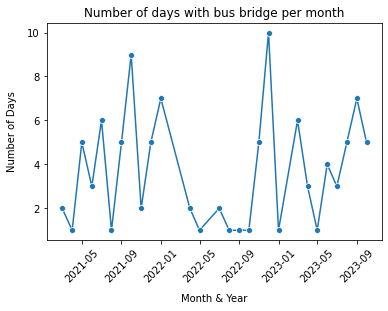

In [18]:
s = lr[lr['bus bridge']==1][['bus bridge', 'date', 'year_month', 'year']].drop_duplicates()
s = s[s['year'] != '2020']
s['year_month'] = pd.to_datetime(s['year_month'])

s = s.groupby(['year_month'])['bus bridge'].count().reset_index(name='count')

sns.lineplot(data=s, 
             x=s.year_month, 
             y="count",
             marker='o')
plt.xticks(rotation=45)
plt.xlabel('Month & Year', labelpad= 10, loc='center')
plt.ylabel('Number of Days', labelpad= 10, loc='center')
plt.title("Number of days with bus bridge per month")
plt.savefig('bus_bridge.png', bbox_inches='tight')

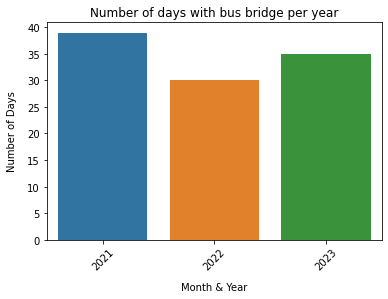

In [19]:
s = lr[lr['bus bridge']==1][['bus bridge', 'date', 'year']].drop_duplicates()
s = s[s['year'] != '2020']
#s.to_csv('s.csv')
#sns.lineplot(data=s, x='date', y="bus bridge")
s = s.groupby(['year'])['bus bridge'].count().reset_index(name='count')

sns.barplot(data=s, 
             x=s.year, 
             y="count")
plt.xticks(rotation=45)
plt.xlabel('Month & Year', labelpad= 10, loc='center')
plt.ylabel('Number of Days', labelpad= 10, loc='center')
plt.title("Number of days with bus bridge per year")
plt.savefig('bus_bridge_per_yr.jpg')

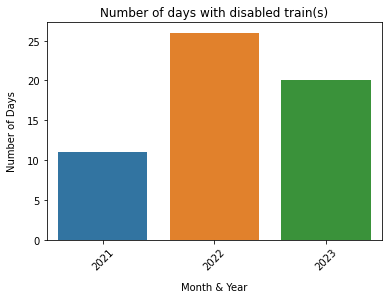

In [20]:
s = lr[lr['disabled']==1][['disabled', 'date', 'year']].drop_duplicates()
s = s[s['year'] != '2020']
#s.to_csv('s.csv')
#sns.lineplot(data=s, x='date', y="bus bridge")
s = s.groupby(['year'])['disabled'].count().reset_index(name='count')

sns.barplot(data=s, 
             x=s.year, 
             y="count")
plt.xticks(rotation=45)
plt.xlabel('Month & Year', labelpad= 10, loc='center')
plt.ylabel('Number of Days', labelpad= 10, loc='center')
plt.title("Number of days with disabled train(s)")
plt.savefig('disabled_train.jpg')

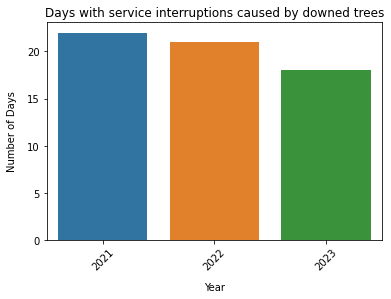

In [21]:
s = lr[lr['tree']==1][['tree', 'date', 'year']].drop_duplicates()
s = s[s['year'] != '2020']
#s.to_csv('s.csv')
#sns.lineplot(data=s, x='date', y="bus bridge")
s = s.groupby(['year'])['tree'].count().reset_index(name='count')

sns.barplot(data=s, 
             x=s.year, 
             y="count")
plt.xticks(rotation=45)
plt.xlabel('Year', labelpad= 10, loc='center')
plt.ylabel('Number of Days', labelpad= 10, loc='center')
plt.title("Days with service interruptions caused by downed trees")
plt.savefig('downed_trees.jpg')

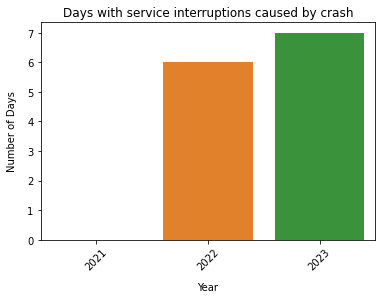

In [22]:
s = lr[lr['crash']==1][['crash', 'date', 'year']].drop_duplicates()
s = s[s['year'] != '2020']
#s.to_csv('s.csv')
s = s.groupby(['year'])['crash'].count().reset_index(name='count')
s.loc[len(s)] = ['2021', 0]
s.sort_values(by='year', inplace=True)
sns.barplot(data=s, 
             x=s.year, 
             y="count")
plt.xticks(rotation=45)
plt.xlabel('Year', labelpad= 10, loc='center')
plt.ylabel('Number of Days', labelpad= 10, loc='center')
plt.title("Days with service interruptions caused by crash")
plt.savefig('car_crash.jpg')

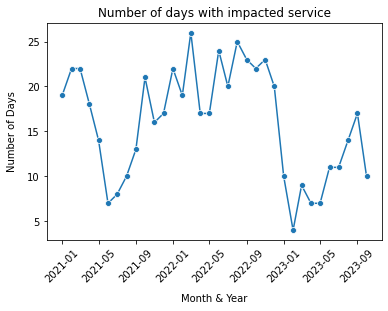

In [23]:
s = lr[lr['impact']==1][['impact', 'date', 'year_month', 'year']].drop_duplicates()
s = s[s['year'] != '2020']
#s.to_csv('s.csv')
s['year_month'] = pd.to_datetime(s['year_month'])
#sns.lineplot(data=s, x='date', y="bus bridge")
s = s.groupby(['year_month'])['impact'].count().reset_index(name='count')

sns.lineplot(data=s, 
             x=s.year_month, 
             y="count",
            marker='o')
plt.xticks(rotation=45)
plt.xlabel('Month & Year', labelpad= 10, loc='center')
plt.ylabel('Number of Days', labelpad= 10, loc='center')
plt.title("Number of days with impacted service")
plt.savefig('delays_per_month.jpg', bbox_inches='tight')

In [24]:
s['count'].mean()

16.029411764705884

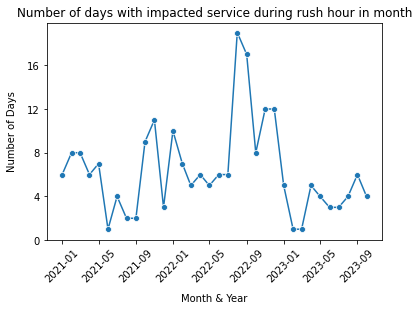

In [25]:
s = lr[(lr['impact']==1) & ((lr['pm_rush']==1) | (lr['am_rush']==1))][['impact', 'date', 'year_month', 'year']].drop_duplicates()

s = s[s['year'] != '2020']
s['year_month'] = pd.to_datetime(s['year_month'])
#sns.lineplot(data=s, x='date', y="bus bridge")
s = s.groupby(['year_month'])['impact'].count().reset_index(name='count')

sns.lineplot(data=s, 
             x=s.year_month, 
             y="count",
            marker='o')
plt.yticks(np.arange(0, 20, 4))
plt.xticks(rotation=45)
plt.xlabel('Month & Year', labelpad= 10, loc='center')
plt.ylabel('Number of Days', labelpad= 10, loc='center')
plt.title("Number of days with impacted service during rush hour in month")
plt.savefig('rush_hr_impact.jpg', bbox_inches='tight')

In [26]:
s['count'].mean()

6.352941176470588